<a href="https://colab.research.google.com/github/AdnaneMOUZAOUI/Analyse-de-sentiments-machine-learning/blob/Reviews-Analysis/analyse_data_set_showroom_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Exploration du fichier ShowRoomprivé 'scrape' issu de Trustpilot



In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import datetime
from datetime import date, datetime, time

In [ ]:

df = pd.read_csv('showroom_trustpilot_168897_07 mars.csv')
df

,nom_client,note_avis,date_achat,date_avis,nbr_avis,text_avis,pays,titre_avis
0,Agani,1.0,: 26 août 2022,2023-02-27,2.0,Je n’ai jamais reçu ma commande. J’ai écris à ...,FR,Je n’ai jamais reçu ma commande
1,CHANTAL SLATKINE,1.0,: 26 février 2023,2023-02-27,2.0,J'ai commandé 2 colliers. L'un est OK l'autre ...,FR,J'ai commandé 2 colliers
2,LDC,1.0,: 26 février 2023,2023-02-27,2.0,"J ai commandé des airpods reconditionnés, dit ...",FR,Très déçue de la dernière commande.
3,anass jeffal,1.0,: 27 octobre 2022,2023-02-27,1.0,Produit acheté en Septembre 2022 retourné le m...,FR,Produit acheté en Septembre 2022…
4,aurélien,1.0,: 27 février 2023,2023-02-27,1.0,encore une commande partiellement annulée au d...,FR,encore une commande partiellement…
...,...,...,...,...,...,...,...,...
168892,Marie,4.0,: 28 décembre 2014,2014-12-28,1.0,Je suis satisfaite de ma commande,FR,satisfaite
168893,Celine,4.0,: 28 décembre 2014,2014-12-28,1.0,Très bien et très rapide\nJe suis satisfaite d...,FR,excellent et très rapide
168894,Da costa,2.0,: 28 décembre 2014,2014-12-28,1.0,J'ai commandé mi octobre pour pouvoir recevoir...,FR,Aujourd'hui je n'ai toujours pas ma commande
168895,Marie,1.0,: 28 décembre 2014,2014-12-28,1.0,"lorsque j'ai vu la toile sur le site, cela m'a...",FR,hyper décevant


# Analyse rapide du dataframe et exploration des données


In [ ]:
display(df.info())

display(df.isna().sum())

display(print('le nombre de doublons est:', df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168897 entries, 0 to 168896
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   nom_client  168896 non-null  object 
 1   note_avis   168896 non-null  float64
 2   date_achat  168896 non-null  object 
 3   date_avis   168896 non-null  object 
 4   nbr_avis    168895 non-null  float64
 5   text_avis   168895 non-null  object 
 6   pays        168895 non-null  object 
 7   titre_avis  168893 non-null  object 
dtypes: float64(2), object(6)
memory usage: 10.3+ MB


None

nom_client    1
note_avis     1
date_achat    1
date_avis     1
nbr_avis      2
text_avis     2
pays          2
titre_avis    4
dtype: int64

le nombre de doublons est: 337


None

In [ ]:
df.dropna(inplace=True)
df.isna().sum()
# les NaN sont peu nombreux et supprimés

nom_client    0
note_avis     0
date_achat    0
date_avis     0
nbr_avis      0
text_avis     0
pays          0
titre_avis    0
dtype: int64

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()
# tout les doublons sont supprimés

0

# choix de l'intervalle de dates

dans ce dataframe, les avis sont postés depuis fin décembre 2014 jusqu'à février 2023
nous allons nous intéresser aux années civiles complètes. Donc nous prendrons les dates
du 01 janvier 2015 jusqu'au 31 décembre 2022

Ceci nous facilitera les comparaisons en fonction des années, des mois et pour avoir des saisons complètes.


In [ ]:
df = df[ (df['date_avis']>='2015-01-01') & ( df['date_avis']<='2022-12-31') ]
df

,nom_client,note_avis,date_achat,date_avis,nbr_avis,text_avis,pays,titre_avis
0,Keira,1.0,: 28 décembre 2022,2022-12-31,4.0,Colis non livré et pour mener des investigatio...,FR,Colis non livré et pour mener des…
1,Pauline,1.0,: 29 décembre 2022,2022-12-31,1.0,Date de l'expérience: 29 décembre 2022,FR,Mauvais article reçu
2,Client,3.0,: 30 décembre 2022,2022-12-31,5.0,Les tailles de cette marque sont totalement di...,FR,Les tailles de cette marque sont…beaucoup plus...
3,Brigitte Noel-tiprez,3.0,: 31 décembre 2022,2022-12-31,4.0,Le problème c'est la livraison trop loin du do...,FR,Le problème c'est la livraison trop…
4,Lili,5.0,: 26 décembre 2022,2022-12-31,1.0,Commande reçue rapidement. J’ai reçu les infor...,FR,Commande reçue rapidement
...,...,...,...,...,...,...,...,...
165962,Bruno,1.0,: 29 décembre 2014,2015-01-05,1.0,Article livré en retard et endomagé,FR,S'abstenir
165963,M�lanie,5.0,: 28 décembre 2014,2015-01-23,1.0,tout s'est bien passé !,FR,super
165964,Jenny,2.0,: 28 décembre 2014,2015-01-19,9.0,C'est la première fois que je suis déçu par un...,FR,pendentif perle
165965,Angeline,3.0,: 28 décembre 2014,2015-01-06,2.0,La commande recue ne vaut vraiment pas plus qu...,FR,Mauvaise qualité


In [ ]:
df['date_avis'] = pd.to_datetime(df['date_avis'])
df['date_avis']

0        2022-12-31
1        2022-12-31
2        2022-12-31
3        2022-12-31
4        2022-12-31
            ...    
165962   2015-01-05
165963   2015-01-23
165964   2015-01-19
165965   2015-01-06
165966   2015-01-23
Name: date_avis, Length: 165967, dtype: datetime64[ns]

In [ ]:
# Réinitialisation de l'indes de df,
# les lignes supprimées ont créé un index discontinu en valeurs

df.reset_index(drop=True, inplace=True)

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


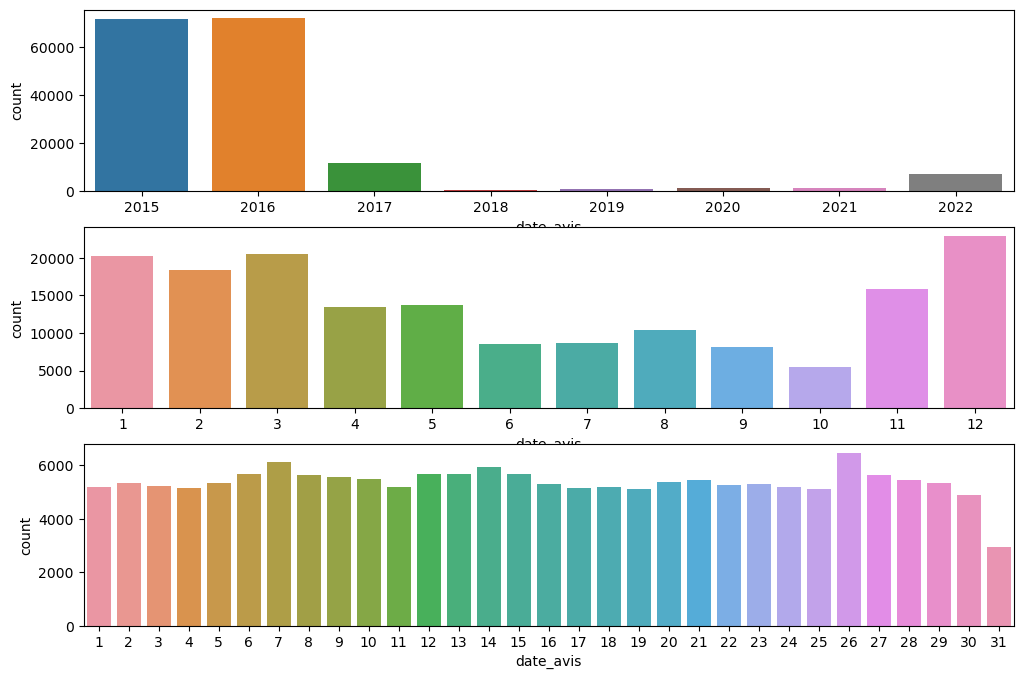

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.countplot( df['date_avis'].dt.year);
print()
plt.subplot(3,1,2)
sns.countplot( df['date_avis'].dt.month);
print()
plt.subplot(3,1,3)
sns.countplot( df['date_avis'].dt.day);

In [ ]:
df['date_avis'].dt.year.value_counts()

2016    72261
2015    71925
2017    11727
2022     6843
2020     1212
2021     1089
2019      573
2018      337
Name: date_avis, dtype: int64



# Analyse des graphique des avis en fonction des dates

Dans le graphique en countplot, en fonction des années, nous remarquons un nombre très élevé d'avis postés pour l'année 2015 et 2016.
pour les autres années, le nombre d'avis ne semble pas suivre une courbe ou une tendance, il est assez dispersé.


Au cours d'une année, les avis publiés sont nombreux les premiers mois de l'année ( janvier à mars) et en
fin d'année (novembre et décembre)

pour les mois de avril et mai, le nombre d'avis postés diminue par rapport aux mois cités ci-dessus
et plus nombreux que les mois de ( juin à octobre)

Au cours d'un mois, la distribution du nombre d'avis ne semble pas dégager une tendance particulière, c'est globalement
partout pareil.
sur le graphique nous constatons que le jour numéro 31 est moins élevé que les autres, ceci est dû au fait que
seuls 7 mois de l'année sont comptabilisés en jour 31.


In [ ]:
display(df['note_avis'].value_counts())

display( ((df['note_avis'].value_counts(normalize=True).round(2)) *100).astype(str) + '%' )

5.0    56219
4.0    43154
3.0    30136
1.0    21344
2.0    15114
Name: note_avis, dtype: int64

5.0    34.0%
4.0    26.0%
3.0    18.0%
1.0    13.0%
2.0     9.0%
Name: note_avis, dtype: object

In [ ]:
df_5_etoiles = df[df['note_avis']==5]
df_4_etoiles = df[df['note_avis']==4]
df_3_etoiles = df[df['note_avis']==3]
df_2_etoiles = df[df['note_avis']==2]
df_1_etoiles = df[df['note_avis']==1]



In [ ]:
# calculer les moyennes des notes en mensuel/anné/ et la comparer avec la moyenne générale
# voir si on peut dégager des  saisonnalités/tendance/caractéristiques/

# approfondir la question du nombres d'avis en 2015/ 2016